### Identification Dog Breed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage
import sklearn
from google.colab import drive
import csv


In [2]:
##Importing Tensorflow and checking its version
import tensorflow as tf
import tensorflow_hub as tfhub
print("The version of Tensorflow:",tf.__version__)
print("The version of Tensorflow_hub:",tfhub.__version__)
## checking if the GPU is availabe
print("GPU," "availabe(yesss)" if tf.config.list_physical_devices("GPU") else "not availabel" )

The version of Tensorflow: 2.12.0
The version of Tensorflow_hub: 0.13.0
GPU,availabe(yesss)


In [3]:
drive.mount('/content/drive')
training_object = open("/content/drive/MyDrive/Neural_Network_Dataset/Datasets/labels.csv")
df = pd.read_csv(training_object)

Mounted at /content/drive


### Loading our Data and check if it correct or not

In [4]:
df.head(15)  ## checkig data frame


id               breed
0   000bec180eb18c7604dcecc8fe0dba07         boston_bull
1   001513dfcb2ffafc82cccf4d8bbaba97               dingo
2   001cdf01b096e06d78e9e5112d419397            pekinese
3   00214f311d5d2247d5dfe4fe24b2303d            bluetick
4   0021f9ceb3235effd7fcde7f7538ed62    golden_retriever
5   002211c81b498ef88e1b40b9abf84e1d  bedlington_terrier
6   00290d3e1fdd27226ba27a8ce248ce85  bedlington_terrier
7   002a283a315af96eaea0e28e7163b21b              borzoi
8   003df8b8a8b05244b1d920bb6cf451f9             basenji
9   0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound
10  004396df1acd0f1247b740ca2b14616e   shetland_sheepdog
11  0067dc3eab0b3c3ef0439477624d85d6        walker_hound
12  00693b8bc2470375cc744a6391d397ec         maltese_dog
13  006cc3ddb9dc1bd827479569fcdc52dc            bluetick
14  0075dc49dab4024d12fafe67074d8a81     norfolk_terrier

In [5]:
df.shape, len(df), df.describe  ## checking the info about the our dataframe

((10222, 2),
 10222,
 <bound method NDFrame.describe of                                      id                     breed
 0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
 1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
 2      001cdf01b096e06d78e9e5112d419397                  pekinese
 3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
 4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
 ...                                 ...                       ...
 10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
 10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
 10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
 10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
 10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever
 
 [10222 rows x 2 columns]>)

In [6]:
## checking the unqiue names in the breed col
len(np.unique(df["breed"])) ## we have 120 different breed
np.unique(df["breed"])

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

### How many images are there of each breed

In [7]:
df["breed"].value_counts()  ##Shows how many iamges are there for each breed types

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

<Axes: >

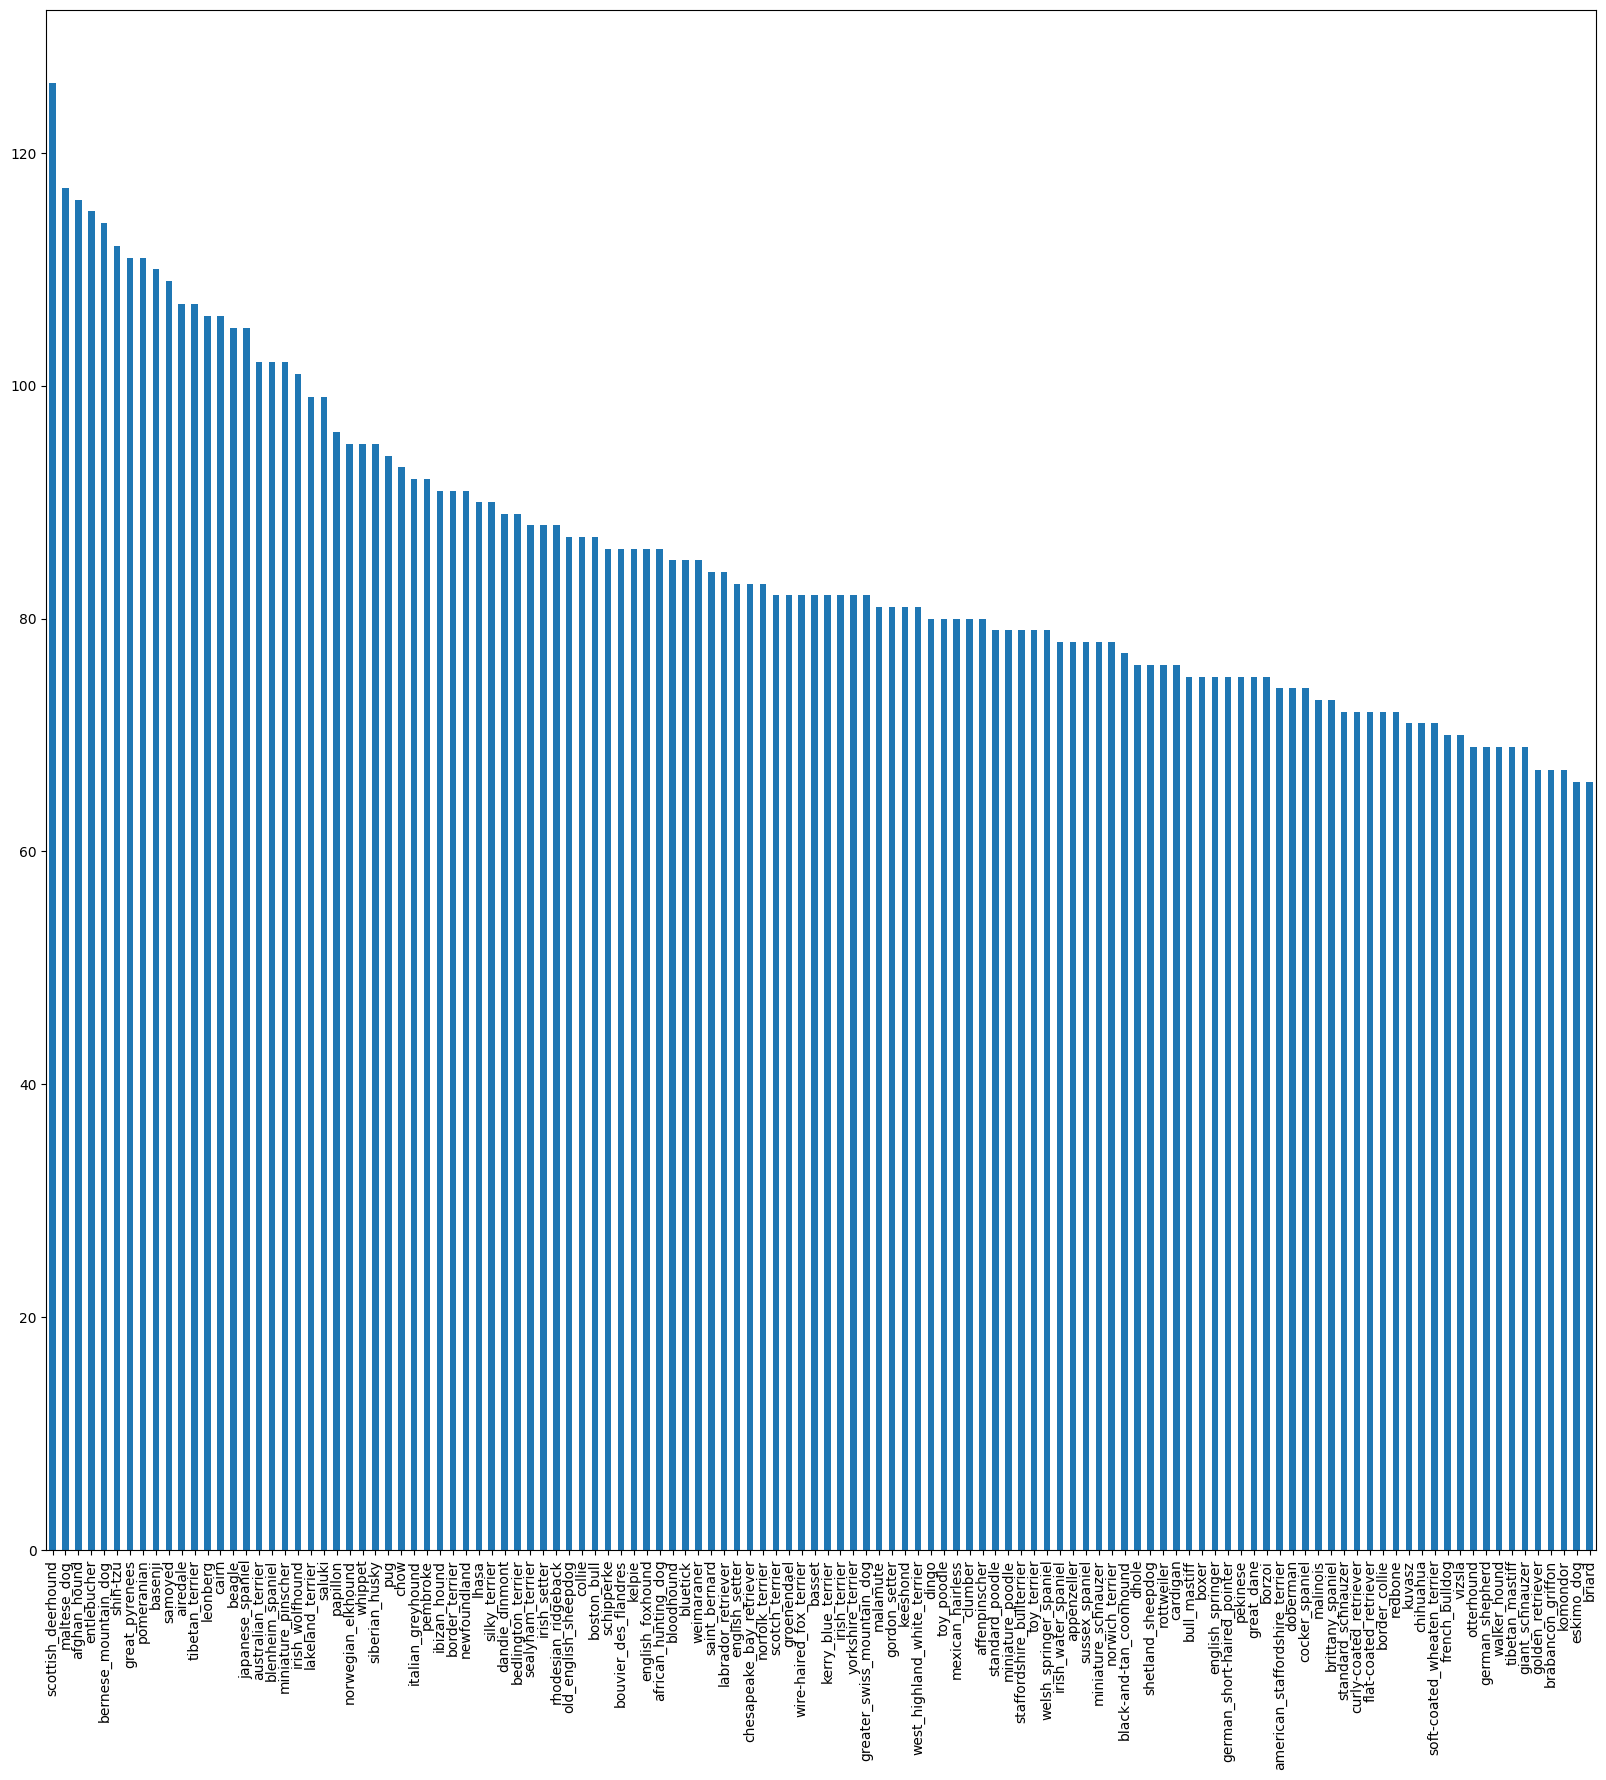

In [8]:
### ploting the graph of all the breeds
df["breed"].value_counts().plot.bar(figsize=(20,20))


In [9]:
## checking the median and mean value of breed columns
df["breed"].value_counts().mean()


85.18333333333334

In [10]:
df["breed"].value_counts().median()

82.0

### --------------------------Viewing an Image-------------------------

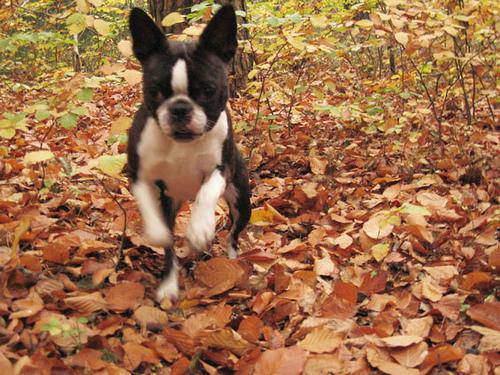

In [11]:
from IPython.display import Image
Image("/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train/000bec180eb18c7604dcecc8fe0dba07.jpg")


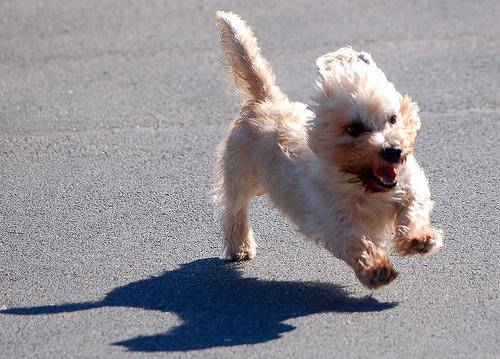

In [12]:
from IPython.display import Image
Image("/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train/ffd3f636f7f379c51ba3648a9ff8254f.jpg")


### Getting Images and their labels for X AND Y



In [13]:
### create pathnames form iImage ID'S
### The below filename_list will work as X labels for our data training data set
filename_list = ["/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train/"+ fname + ".jpg"for fname in df["id"]]


## checking the id of all images
filename_list[:10]



['/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train/0042188c895a2f14ef6

In [14]:
import os
os.listdir("/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train")[:10]

['e7f491cb903ff0a294eb63c625ef090e.jpg',
 'e7ab11f849e895ced3cdddf4d90e5bd2.jpg',
 'e76ab0b6cd07a1583ef84a2d4dc98aca.jpg',
 'e7997562415c62141d022cfa8cae1c60.jpg',
 'e79578de293a0b46e92448ce8f8bb69f.jpg',
 'e7c5692d044250d303a839d989132bf1.jpg',
 'e7f6ec634384c07f7a0f5659e4f77867.jpg',
 'e7bc17ef352ef576b73467ebe9a407f1.jpg',
 'e7ab74acdc860dfb93271901da085ffd.jpg',
 'e7af8f590b4fbdca0779f5e606ef91a1.jpg']

Checking for Missing

In [15]:
df.isna().sum()

id       0
breed    0
dtype: int64

In [16]:
## Checking whether number of filenames match number of actual images file

import os
if len(os.listdir("/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train"))==len(filename_list):
  print("Filename match")
else:
  print("Filename do no match actual amount")



Filename match


In [17]:
df[:10]

id               breed
0  000bec180eb18c7604dcecc8fe0dba07         boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97               dingo
2  001cdf01b096e06d78e9e5112d419397            pekinese
3  00214f311d5d2247d5dfe4fe24b2303d            bluetick
4  0021f9ceb3235effd7fcde7f7538ed62    golden_retriever
5  002211c81b498ef88e1b40b9abf84e1d  bedlington_terrier
6  00290d3e1fdd27226ba27a8ce248ce85  bedlington_terrier
7  002a283a315af96eaea0e28e7163b21b              borzoi
8  003df8b8a8b05244b1d920bb6cf451f9             basenji
9  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound

In [18]:
##Checking breeds names
df["breed"][1]

'dingo'

## ---------------------------Preparing our labels-------------------------

In [19]:
# we will make our labesl into an array form

labels = df["breed"].to_numpy()  ## this will make array of all the dog breed

In [20]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [21]:
## See if number of labels matches filname

if(len(labels)== len(filename_list)):
  print("Match !!! there is no missing data")
else:
  print("mssing data!!! please drop those")

Match !!! there is no missing data


In [22]:
print(labels[0])

boston_bull


### --------------------Turing all labels into boolean array and then convert into numbers-----------------------

In [23]:
unique_labels = np.unique(df["breed"])

In [24]:
from pandas.core.arrays import boolean
boolean_labels = [labels == unique_labels for labels in labels]

In [25]:
## checking the len of boolean_labesl
len(boolean_labels)

10222

In [26]:
boolean_labels[:10]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

### Converting our boolean_labels into integers

Testing Case

In [27]:
## example: Turing boolean array into integers
print(labels[0])  ## original labels
print(np.where(unique_labels==labels[0]))  # index where labels ocuur
print(boolean_labels[0].argmax) # idex where labels occur in boolena
print(boolean_labels[0].astype(int))  ### This will convert the idex into array formatr of 0's and 1's

boston_bull
(array([19]),)
<built-in method argmax of numpy.ndarray object at 0x7fbf1015e730>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Spiltting the data into X AND Y

In [28]:
X = filename_list   ## this like the features(which is bascially images)
Y = boolean_labels          ## this is labels or target

As we know there are 10,000 data and experimenting with them will take to much time, so we will just used some amount of traninng data in starting

## Spliting the data into Train and validation

In [29]:
## For now we will take 1000 traing data
NUM_IMAGES = 1000

## Now we use use train_test split lib, to make the data into traning and validation set, insted of test, becouse we already have test data set

#lets split our data into traina and validataion
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X [:NUM_IMAGES],Y[:NUM_IMAGES],test_size =0.2)


In [30]:
### Checking the len of X_train, X_val Y_train, Y_val
len(X_train),len(X_val) , len(Y_train), len(Y_val)

(800, 200, 800, 200)

## Preprocessing Images(Turing images into Tensoors)

To preprocess our images into tensor we are going to write a function

1. Take an image filepath as input
2. Use Tensorflow to read file and save it to variable, image
3. Turn images (a.jpg) in tensor
4. Normalize our image (convert color channel from 0-255 to 0-1)
4. Resize the image to be a shape (224,224)
5. retrun the modified image


Converting the images into array

In [31]:
### convert the images to Numpy
from matplotlib.pyplot import imread
# "/content/drive/MyDrive/Neural_Network_Dataset/Datasets/train/000bec180eb18c7604dcecc8fe0dba07.jpg"
image = imread(filename_list[42])
image.shape

(257, 350, 3)

In [32]:
image.max(), image.min()
## Images are made up of RGB, which ranges from 0 to 255 pixel value

(255, 0)

In [33]:
### changing the image to Tensor
tf.constant(image)[:2]


<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

## Create a function to convert image into tensor

In [34]:
# Define image Size
IMG_SIZE = 224

# CREATE a function for preprocessing image

def process_images(image_file_path):

  """
  Taking the image file path and turns the image into tensor
  """

  # Reaing an image file
  image = tf.io.read_file(image_file_path)
  ## Turn the jpeg image into numerical Tensor with 3 color channels
  image = tf.image.decode_jpeg(image, channels=3)

  ## convert the colour channel value from 0-255 to 0-1 values(Normalization)
  image = tf.image.convert_image_dtype(image,tf.float32)

  ## Resize the images to our desired value (224,224)

  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])

  return image


In [35]:
#tensor = tf.io.read_file(filename_list[26])
#tensor

### Turning Data into Batches

In [36]:
### The batch size should not be more than 32
### I order to use Tensorflow effective ,we need our data in the form of Tensor tuples( which look like (image, label))

Creating a function to return tuple for image

In [37]:
def get_image_label(image_path, label):
  image= process_images(image_path)
  return image, label

In [38]:
### testing the above function
(process_images(X[42]),tf.constant(Y[42]))   # where X = filepaths names as features and Y = targert(breed labels)

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we will make a function to convert all of our data X and Y into batches

In [39]:
## Define the batch size , 32

BATCH_SIZE =32

### Creating a function to turn data into batches

def create_data_batches(X, Y=None, batch_size=BATCH_SIZE, valid_data = False, test_data= False):

  """
   creates batch of data out of image (x) and (y) pairs
   Shuffles the data if it's training data but doesn't shuffle if its validation data
   Also accept test data as input(No labels)

  """

  # If the data is test data, we probably dont have labesl

  if test_data  :
    print("Creating the test data batches !")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))  # only file path , with no labels
    data_batch = data.map(process_images).batch(BATCH_SIZE)
    return data_batch



  # If the data is valid data set, we will not shuffle
  elif valid_data:
    print("Creating the  valdation data batches !")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(Y)))  # only file path= X and labels =Y
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  ## IF the data is training data set  we will shuffer

  else:
    print("Creating the trainning data batches !")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(Y))) # only file path , with labels

    ## shuffle pathnames and labels before images process to save time
    #data = data.shuffle(buffer_size = len(X))   # we will shuffle whole data set

    data = data.map(get_image_label)   # create (image,label) to tuples

    data_batch = data.batch(BATCH_SIZE)

  return data_batch


### Creating traning and Validation data set

In [40]:
train_data = create_data_batches(X_train, Y_train)
val_data = create_data_batches(X_val, Y_val, valid_data = True)

Creating the trainning data batches !
Creating the  valdation data batches !


In [41]:
## Check out the different attributes of our data batches
train_data.element_spec , val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing the Images of batch

In [42]:
#train_data  ## just checking the training data set form the batches


In [43]:
def visual_image(image, labels):
  plt.figure(figsize=(15,15))

  for i in range(25):
    ax= plt.subplot(5,5,i+1)  #( we will have 5 rows and 5 columns)
    plt.imshow(image[i])      # display the images

    ## adding the images labels as title which is breed name
    plt.title(unique_labels[labels[i].argmax()])
    plt.axis("off")


In [44]:
## the below code is use to loop through the batches on after the other, and undo the batches and put into a train image and train label
train_image, train_labels = next(train_data.as_numpy_iterator())


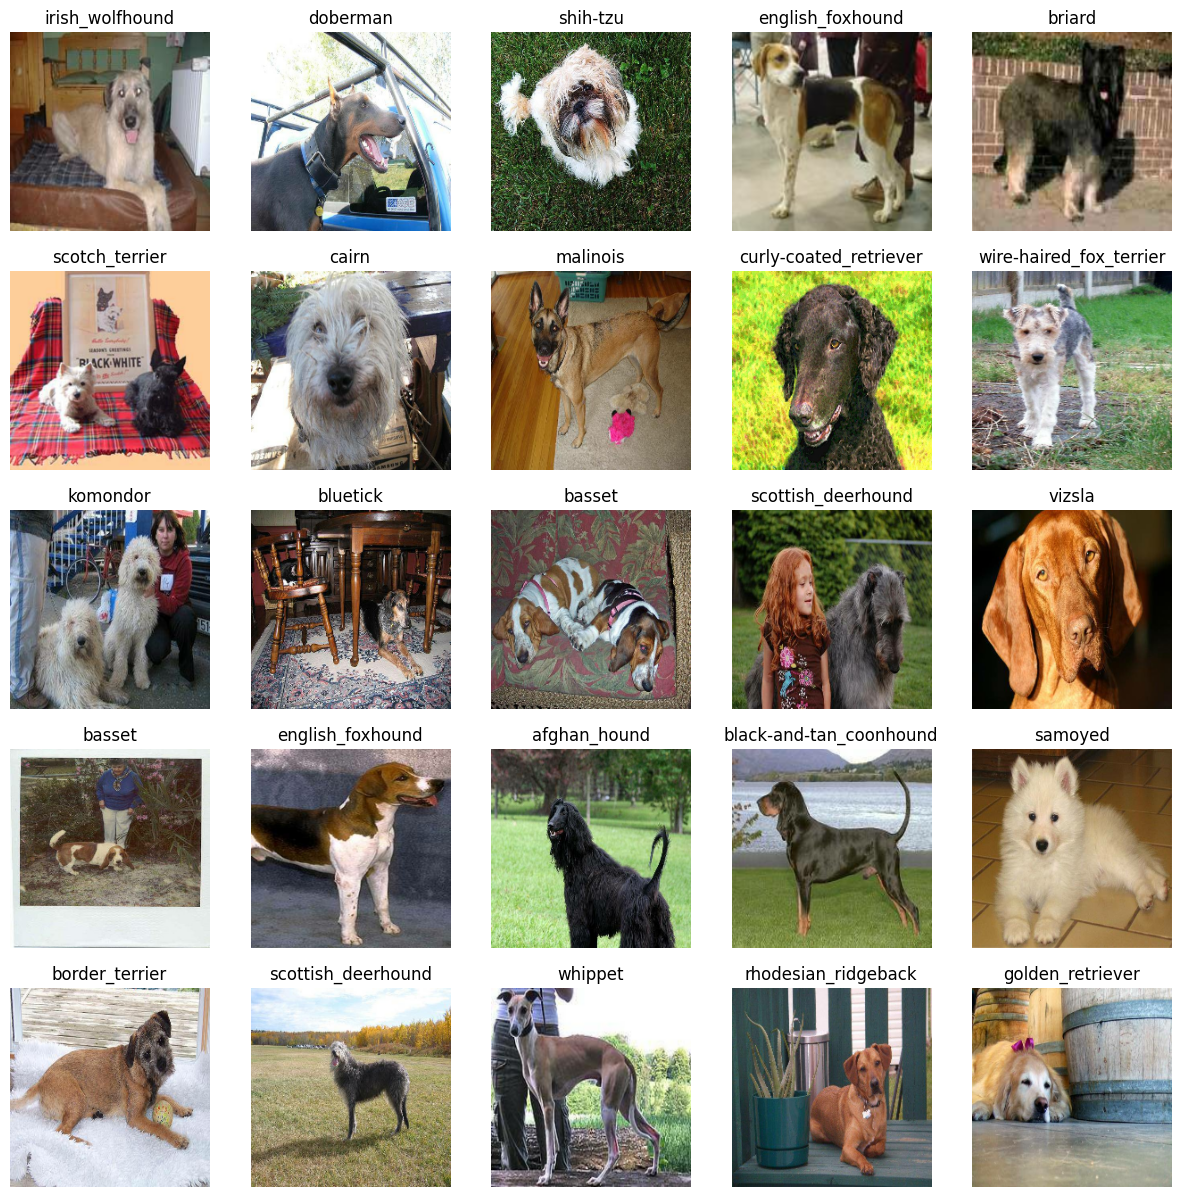

In [45]:

## Now we can see the images from the training data sets in batches

visual_image(train_image, train_labels)

### Building a Models

In [46]:

# Setup the input shape to the model
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE, 3]  # NONE = BATCH =32, IMAGE_SIZE =224, 3 = rgb(Channel)

# setup the output the shape of our model
OUTPUT_SHAPE = len(unique_labels)   # the output will be one of the unique labels of breeds=120
## setting the MobileNet V2 models from tf hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"


### Creating function for model

In [47]:

def create_model( input_shape =INPUT_SHAPE,output_shap= OUTPUT_SHAPE,model_url=MODEL_URL ):


  ## setup th model layers, where units = 120 ,becouse we need only 120 breeds ,insted of mobilnet v2 units
  model = tf.keras.Sequential([
      tfhub.KerasLayer(MODEL_URL), ## layer=1 , input layer
      tf.keras.layers.Dense(units= OUTPUT_SHAPE,activation= "softmax") ## layer 2 (output layer)

  ])

  ## compile the model

  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(), ## minimize the loss (more the loss worst the model is trianing and gusseing)
      optimizer = tf.keras.optimizers.Adam(),  ## help to reduce the loss function
      metrics = ["accuracy"]
  )

  ## Build the model
  model.build(INPUT_SHAPE)

  return model


In [48]:
model = create_model() ## creating the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [49]:
## To see your model weights
#model.weights

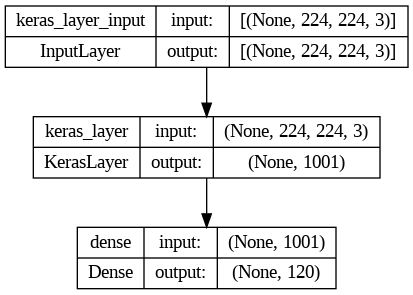

In [50]:
## This line of code help you to graph the layer of our model and shape of input and output
tf.keras.utils.plot_model(model,show_shapes=True)

### Creating  TensorBaord callbacks
This will help to see how our model is doing during traning


In [51]:
from keras.callbacks import TensorBoard
## TensorBoard callback function
#%load_ext TensorBoard

import  datetime
## create a function to build a tensorflow callback

def create_tensorboard_callback():

  # create a log directory for storing tensorboard
    logdir = os.path.join("/content/drive/MyDrive/Neural_Network_Dataset/Datasets/logs",
                          datetime.datetime.now().strftime("%Y%m%d -%H%M%S"))

    return tf.keras.callbacks.TensorBoard(logdir)


### Creating Early Stopping Callback function

In [52]:
Early_stop_callback =tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

### Trainning a model

In [53]:
# define the number of epocs
NUM_EPOCS = 100


def train_model():

  # Train a give model and retrun the train model

  # creating the model
  model = create_model()
  #Create a tensorboard when we training model
  tenserboard = create_tensorboard_callback()

  # fitting the model
  model.fit(train_data, epochs=NUM_EPOCS,validation_data=val_data,validation_freq=1, callbacks=[tenserboard, Early_stop_callback])

  return model

In [54]:
# Fit the model to the data
model = train_model()

Epoch 1/100
25/25 [==============================] - 162s 6s/step - loss: 4.5492 - accuracy: 0.0862 - val_loss: 3.3462 - val_accuracy: 0.2650
Epoch 2/100
25/25 [==============================] - 5s 184ms/step - loss: 1.5233 - accuracy: 0.7412 - val_loss: 2.1219 - val_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 3s 118ms/step - loss: 0.5148 - accuracy: 0.9575 - val_loss: 1.6548 - val_accuracy: 0.5850
Epoch 4/100
25/25 [==============================] - 3s 115ms/step - loss: 0.2304 - accuracy: 0.9950 - val_loss: 1.4969 - val_accuracy: 0.5950
Epoch 5/100
25/25 [==============================] - 4s 151ms/step - loss: 0.1362 - accuracy: 1.0000 - val_loss: 1.4355 - val_accuracy: 0.5950
Epoch 6/100
25/25 [==============================] - 4s 151ms/step - loss: 0.0942 - accuracy: 1.0000 - val_loss: 1.4010 - val_accuracy: 0.6050
Epoch 7/100
25/25 [==============================] - 3s 120ms/step - loss: 0.0711 - accuracy: 1.0000 - val_loss: 1.3765 - val_accuracy: 0.6100


### Making and evaluting prediction using a trained model

In [55]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [56]:
# The prediction will contain probabiliies and labels
predictions= model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 3s 83ms/step


array([[5.1673822e-04, 1.0918550e-04, 1.2130554e-05, ..., 1.7809822e-05,
        3.3227878e-04, 2.6605622e-04],
       [1.8864276e-04, 2.3162567e-05, 5.4275726e-05, ..., 6.7016845e-05,
        4.3461220e-03, 1.4298817e-03],
       [6.3042057e-04, 3.8097769e-03, 5.3244794e-04, ..., 4.3860553e-03,
        2.4260937e-03, 2.8861422e-04],
       ...,
       [7.1933557e-04, 1.9005578e-04, 8.6398337e-05, ..., 8.1032061e-04,
        5.1521230e-05, 1.4745175e-03],
       [7.0356269e-04, 1.0817740e-03, 2.0222971e-04, ..., 1.0942094e-04,
        7.2989780e-03, 4.7812227e-04],
       [3.2290263e-06, 1.1317364e-06, 5.0633073e-05, ..., 3.9902882e-04,
        6.4426467e-06, 4.1061334e-04]], dtype=float32)

In [57]:
#np.sum(predictions[0])

In [ ]:
#First prediction
index =90
print(predictions[index])
print(f"Max value(probablity): {np.max(predictions[index])}")
print(f"Sum:{np.sum(predictions[index])} ")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label:  {unique_labels[np.argmax(predictions[index])]}")

In [59]:
#unique_labels[119]

In [60]:
## Turn prediction probs into their labels of breeds

def get_breed_labels(prediction_probabilites):
  return unique_labels[np.argmax(prediction_probabilites)]



In [61]:
## checking the labels
#pred_label = get_breed_labels(predictions[81])
#pred_label

### --------------------------------------Function for  unbatch the dataset ------------------------------------------

In [62]:


## Define a function that will unbatch from the from the validation data set and store images and labels in the list for predictions
def unbatch_data(validation_data_Set):

  # creating list to store image and there labels
  images =[]
  labels =[]

  for image ,label in validation_data_Set.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_labels[np.argmax(label)])
  return images, labels






In [63]:
## Checking the preidction
val_images, val_labels = unbatch_data(val_data)


### Plotting the images of  predicted label vs actual label

In [64]:
def plot_Preds_data(prediction_probabilites, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilites[n],labels[n], images[n]

  # pred_label
  pred_label = get_breed_labels(pred_prob)

  #plotting the graph
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])


  # change the color of title if the prediction is wrong or correct
  if pred_label == true_label:
    color = "green"
  else:
    color= "red"

  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color =color)



## Plotting the image,label accuracy of breeds

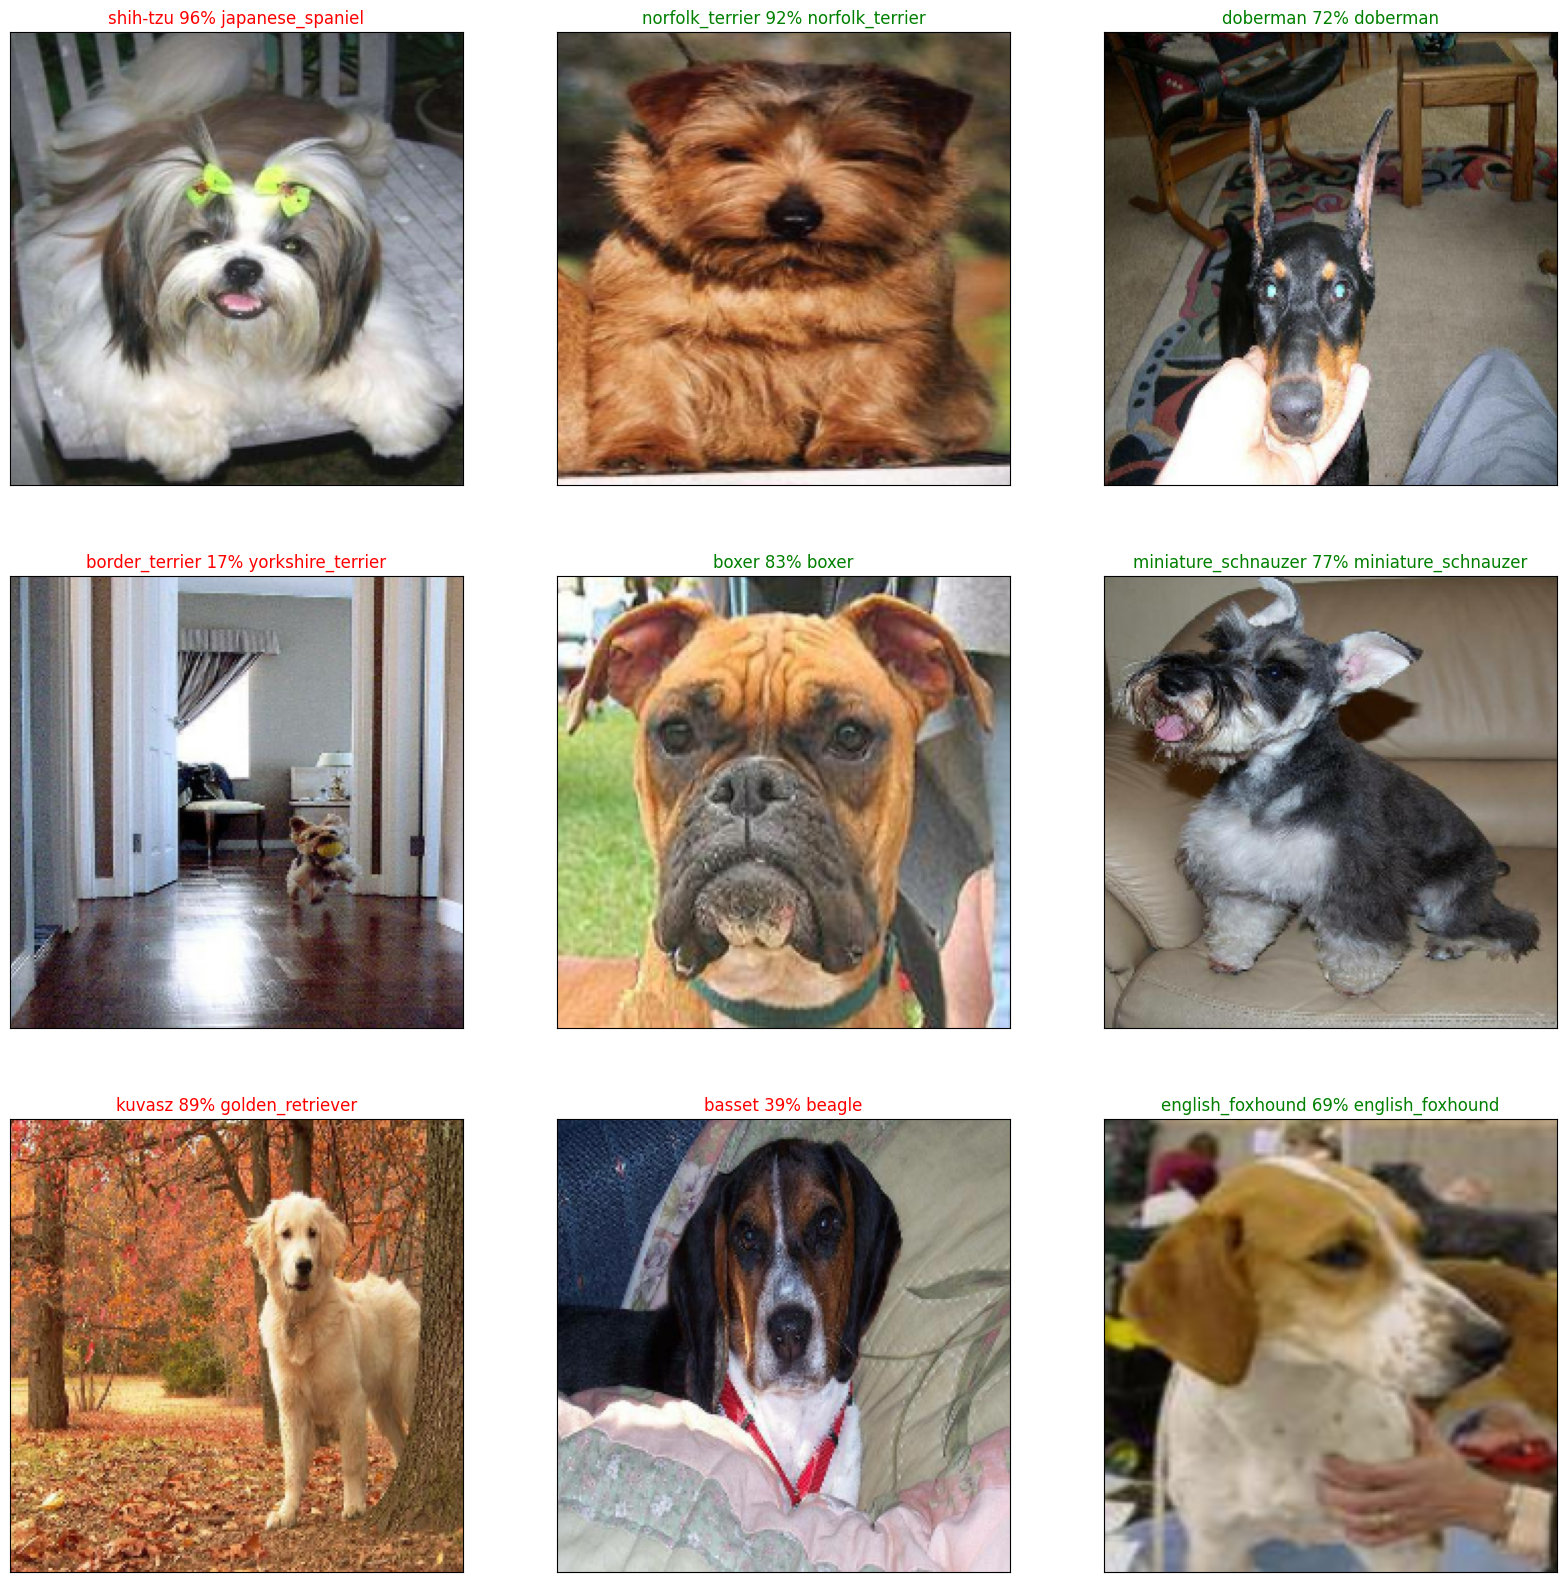

In [65]:
next =0
rows =3
cols=3
num_images = rows*cols

plt.figure(figsize=(20,20))

for i in range(num_images):
  plt.subplot(rows,1*cols,1*i+1)

  # this functon will plot the images of our labels and predicted labels
  plot_Preds_data(predictions,
          labels= val_labels,
          images = val_images,n=i+next)



In [66]:
model.evaluate(val_data)

7/7 [==============================] - 1s 133ms/step - loss: 1.3116 - accuracy: 0.6350


[1.311589241027832, 0.6349999904632568]

### -----------------------------------Saving and loading function ---------------------------

In [67]:
#create a function to save a model
def save_model(model, suffix= None):
  modeldir = os.path.join ("/content/drive/MyDrive/Neural_Network_Dataset/models")
  model_Path = modeldir + "_" +suffix +".h5"  # save the formate of model
  model.save(model_Path)
  return model_Path

In [68]:
## loading the model

def load_model(model_path):

  print(f"Loading the model: {model_path}")
  model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer" :tfhub.KerasLayer})
  return model

In [69]:
#save_model(model,suffix="1000 images-on mobilnetv2")

In [70]:
## code for loading the data back:
#loaded_image_model = load_model("/content/drive/MyDrive/Neural_Network_Dataset/models_1000 images-on mobilnetv2.h5")

### ------------------------------Final-Training on 10,000 Images on mobilenetv2 model---------------------------------------


In [71]:
# we created the batch of full data set by calling our function
full_training_data = create_data_batches(X,Y)



Creating the trainning data batches !


In [72]:
## Now we will create a model from create model data set
model_mobilNet = create_model()  ## This is our model name

In [73]:
## create full model early stopping
full_training_data_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",
                                                                              patience =3)

In [74]:
## Fit the model
model_mobilNet.fit(full_training_data,epochs=NUM_EPOCS, callbacks =[full_training_data_early_stopping])

Epoch 1/100
320/320 [==============================] - 38s 106ms/step - loss: 1.3543 - accuracy: 0.6663
Epoch 2/100
320/320 [==============================] - 35s 109ms/step - loss: 0.4033 - accuracy: 0.8832
Epoch 3/100
320/320 [==============================] - 33s 103ms/step - loss: 0.2328 - accuracy: 0.9434
Epoch 4/100
320/320 [==============================] - 33s 104ms/step - loss: 0.1487 - accuracy: 0.9711
Epoch 5/100
320/320 [==============================] - 33s 102ms/step - loss: 0.1021 - accuracy: 0.9848
Epoch 6/100
320/320 [==============================] - 33s 103ms/step - loss: 0.0738 - accuracy: 0.9921
Epoch 7/100
320/320 [==============================] - 33s 102ms/step - loss: 0.0559 - accuracy: 0.9945
Epoch 8/100
320/320 [==============================] - 33s 103ms/step - loss: 0.0440 - accuracy: 0.9967
Epoch 9/100
320/320 [==============================] - 33s 104ms/step - loss: 0.0357 - accuracy: 0.9977
Epoch 10/100
320/320 [==============================] - 35s 108m

###           -------------------------------Saving our Final Model----------------------------

In [75]:
save_model(model_mobilNet,suffix="Trained with 10k images_of dog breeds") # saving our full model that is trained with 10k images

'/content/drive/MyDrive/Neural_Network_Dataset/models_Trained with 10k images_of dog breeds.h5'

Loading our Fully Trained New model

### ---------------------Loading our Model -------------------------------------


In [77]:
#loading our Model_mobilnet
load_model_mobilNet = load_model("/content/drive/MyDrive/Neural_Network_Dataset/models_Trained with 10k images_of dog breeds.h5")

Loading the model: /content/drive/MyDrive/Neural_Network_Dataset/models_Trained with 10k images_of dog breeds.h5


### ----------------------------------Making Prediction on the Test Dataset-------------------------------------
Since model is been trained on images in form of Tensor batch, to make prediction on the test data, we have to get into same formate

In [78]:
### load test images
test_image_path = "/content/drive/MyDrive/Neural_Network_Dataset/Datasets/test/"
test_filenamees = [test_image_path +fname for fname in os.listdir(test_image_path)]


In [80]:
#test_filenamees[:10]

In [81]:
len(test_filenamees)

10357

In [82]:
## Create test data batch by calling create_Data_batch function
test_Data_images = create_data_batches(test_filenamees, test_data = True)

Creating the test data batches !


In [83]:
test_Data_images

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [84]:
## Make prediction on test data batch using the loaded full model
test_prediction = load_model_mobilNet.predict(test_Data_images,verbose =1)

324/324 [==============================] - 2507s 8s/step


In [85]:
## Save prediction (Numpy array)
#np.savetxt("/content/drive/MyDrive/Neural_Network_Dataset/Datasets/preds_Array.csv",test_prediction,delimiter = ",")

In [86]:
##loading our prediction
#test_predictions_prob = np.loadtxt("/content/drive/MyDrive/Neural_Network_Dataset/Datasets/preds_Array.csv",delimiter = ",")

In [87]:
#test_predictions_prob.shape

(10357, 120)

### ---------------------------------------------Making prediction on Custom Dog Image----------------------------------------

In [88]:
custome_file_image = "/content/drive/MyDrive/Neural_Network_Dataset/Datasets/Custom_Image/"
Custom_filenamees = [custome_file_image +fname for fname in os.listdir()]

In [89]:
len(Custom_filenamees)

4

In [91]:
## Now pass our custom file names into batch function

custom_Dog_Data = create_data_batches(Custom_filenamees,test_data=True)

Creating the test data batches !


In [92]:
custom_Dog_Data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [93]:
Custom_prediction = load_model_mobilNet.predict(custom_Dog_Data,verbose=1)

1/1 [==============================] - 2s 2s/step


In [95]:
Custom_prediction.shape

(4, 120)

In [99]:
## Get Custom Image prediction label
Custom_pred_labels = [get_breed_labels(Custom_prediction[i]) for i in range (len(Custom_prediction))]
Custom_pred_labels

['kuvasz', 'maltese_dog', 'german_shepherd', 'lhasa']

In [100]:
custom_image = []

for image in custom_Dog_Data.unbatch().as_numpy_iterator():
  custom_image.append(image)

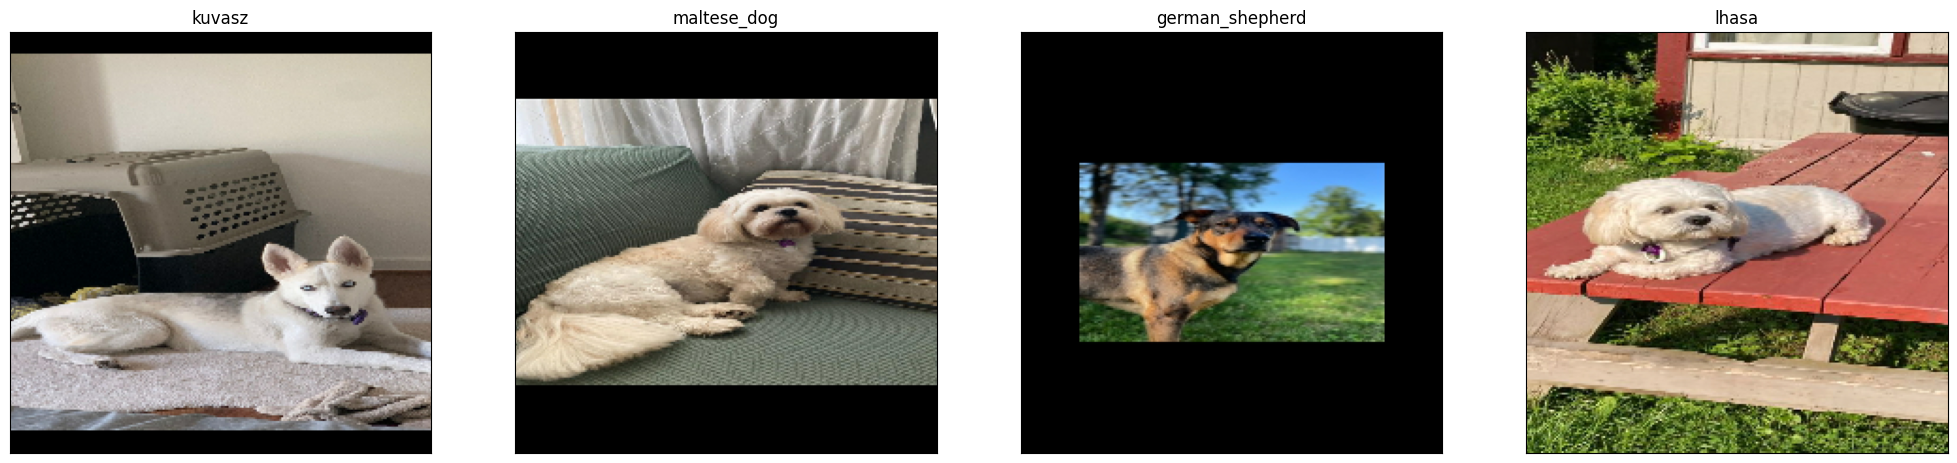

In [103]:
## Check Custom image prediction

plt.figure(figsize=(25,25))
for i, image in enumerate(custom_image):
  plt.subplot(1,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(Custom_pred_labels[i])
  plt.imshow(image)